In [5]:
pip install tensorflow


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.w

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import keras
import tensorflow as tf

In [3]:
start = '2014-01-01'
end = pd.to_datetime('today')
stock = 'GOOG'

data = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [7]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02 00:00:00+00:00,27.656164,27.724083,27.839401,27.603037,27.782366,73129082
1,2014-01-03 00:00:00+00:00,27.454418,27.521841,27.818977,27.520098,27.770908,66917888
2,2014-01-06 00:00:00+00:00,27.760517,27.828691,27.867046,27.557707,27.721344,71037271
3,2014-01-07 00:00:00+00:00,28.295691,28.365179,28.385853,27.924334,28.019974,102486711
4,2014-01-08 00:00:00+00:00,28.354576,28.424210,28.575891,28.226450,28.543015,90036218
...,...,...,...,...,...,...,...
2747,2024-12-02 00:00:00+00:00,172.979996,172.979996,173.600006,170.270004,170.320007,16593400
2748,2024-12-03 00:00:00+00:00,173.020004,173.020004,174.320007,172.509995,173.119995,15721500
2749,2024-12-04 00:00:00+00:00,176.089996,176.089996,176.429993,172.750000,172.779999,18239800


In [9]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02 00:00:00+00:00,27.656164,27.724083,27.839401,27.603037,27.782366,73129082
1,2014-01-03 00:00:00+00:00,27.454418,27.521841,27.818977,27.520098,27.770908,66917888
2,2014-01-06 00:00:00+00:00,27.760517,27.828691,27.867046,27.557707,27.721344,71037271
3,2014-01-07 00:00:00+00:00,28.295691,28.365179,28.385853,27.924334,28.019974,102486711
4,2014-01-08 00:00:00+00:00,28.354576,28.424210,28.575891,28.226450,28.543015,90036218
...,...,...,...,...,...,...,...
2747,2024-12-02 00:00:00+00:00,172.979996,172.979996,173.600006,170.270004,170.320007,16593400
2748,2024-12-03 00:00:00+00:00,173.020004,173.020004,174.320007,172.509995,173.119995,15721500
2749,2024-12-04 00:00:00+00:00,176.089996,176.089996,176.429993,172.750000,172.779999,18239800


In [11]:
ma_100_days = data.Close.rolling(100).mean()

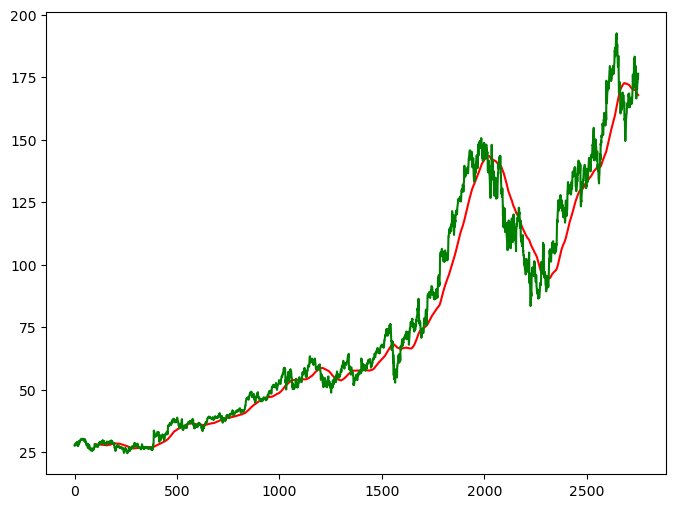

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

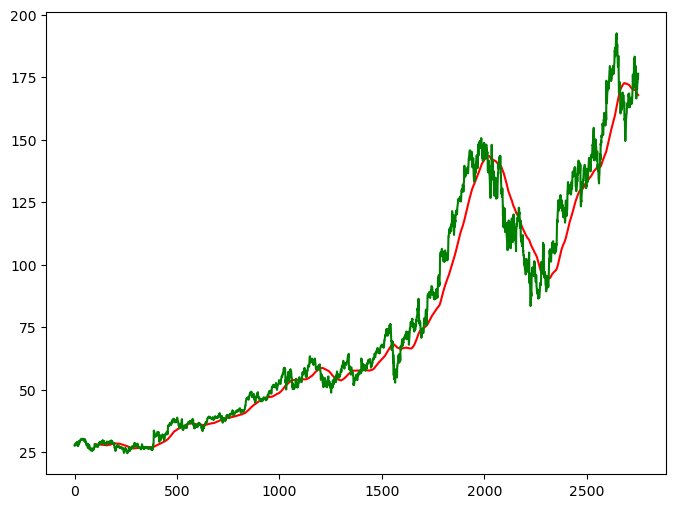

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [17]:
ma_200_days = data.Close.rolling(200).mean()

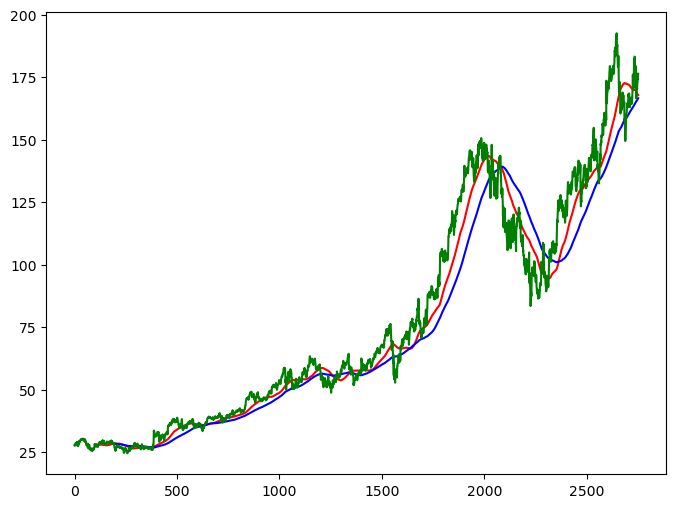

In [19]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [21]:
data.dropna(inplace=True)

In [23]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [25]:
data_train.shape[0]

2201

In [27]:
data_test.shape[0]

551

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_train_scale = scaler.fit_transform(data_train)

In [31]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [35]:
x, y = np.array(x), np.array(y)

In [37]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [39]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\bsmaw\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [43]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 199ms/step - loss: 0.0597
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - loss: 0.0068
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - loss: 0.0067
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - loss: 0.0051
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - loss: 0.0057
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - loss: 0.0054
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - loss: 0.0054
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - loss: 0.0042
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - loss: 0.0044
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - loss: 0.0042
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - loss: 0.0036
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - loss: 0.0033
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - loss: 0.0045
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - loss: 0.0037
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [70]:
pas_100_days = data_train.tail(100)

In [72]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [74]:
data_test_scale  =  scaler.fit_transform(data_test)

In [76]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [78]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


In [79]:
scale =1/scaler.scale_

In [80]:
y_predict = y_predict*scale

In [84]:
y = y*scale

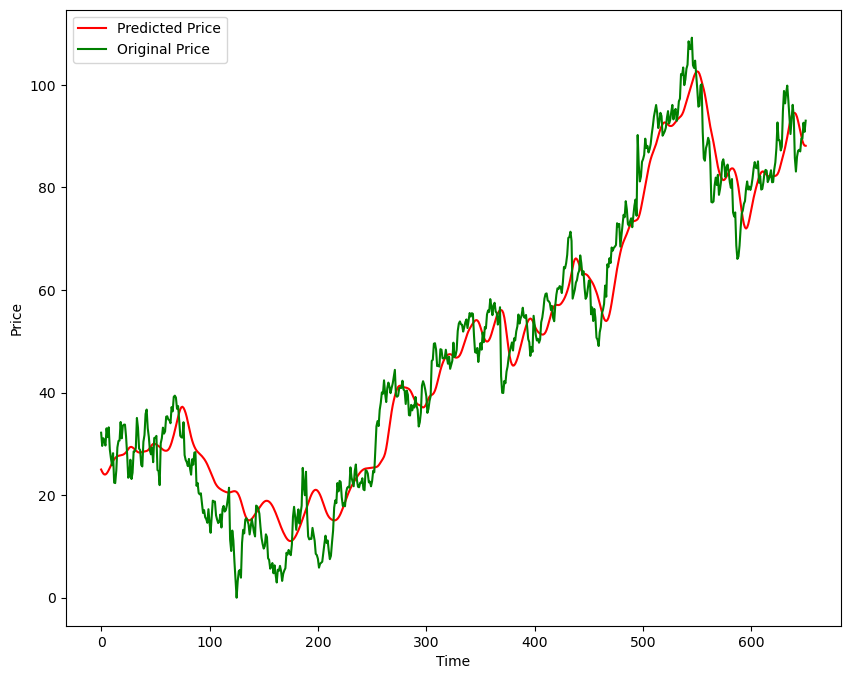

In [86]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [88]:
model.save('Stock Predictions Model.keras')